# COVID-19 Data Exploration

This Jupyter notebook looks at using an API from the [UK Government](https://coronavirus.data.gov.uk/details/developers-guide).

The purpose of this exercise is for myself to improve my data analysis and programming skills in Python.

Feel free to clone this repo if you want to take a look around! The requirements for running this notebook have been exported to the requirements.txt file.

More documentation for this library can be found [here](https://publichealthengland.github.io/coronavirus-dashboard-api-python-sdk/index.html)

In [2]:
from uk_covid19 import Cov19API
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

sns.set_theme(style="darkgrid", context="talk")

In [3]:
%matplotlib inline

In [4]:
init_notebook_mode(connected=True) #connects JS to the notebook

In [5]:
cf.go_offline() #allows to use cufflinks offline

In [6]:
area_filter = [
    'areaType=ltla',
    'areaName=Milton Keynes'
]

structure_dict = {
    "date": "date",
    "newCasesByPublishDate": "newCasesByPublishDate",
    "cumCasesByPublishDate": "cumCasesByPublishDate",
    "newDeaths28DaysByDeathDate": "newDeaths28DaysByDeathDate",
    "cumDeaths28DaysByDeathDate": "cumDeaths28DaysByDeathDate",
}

api = Cov19API(filters=area_filter, structure=structure_dict)
df = api.get_dataframe()

# reverse the order, so the graph starts with the earliest date
df = df.iloc[::-1]

# clean up! Replace nan with 0
df.replace(np.nan, 0, inplace=True)

<AxesSubplot:title={'center':'COVID-19 Milton Keynes (new cases)'}, xlabel='Date from 05-03-2020', ylabel='New cases'>

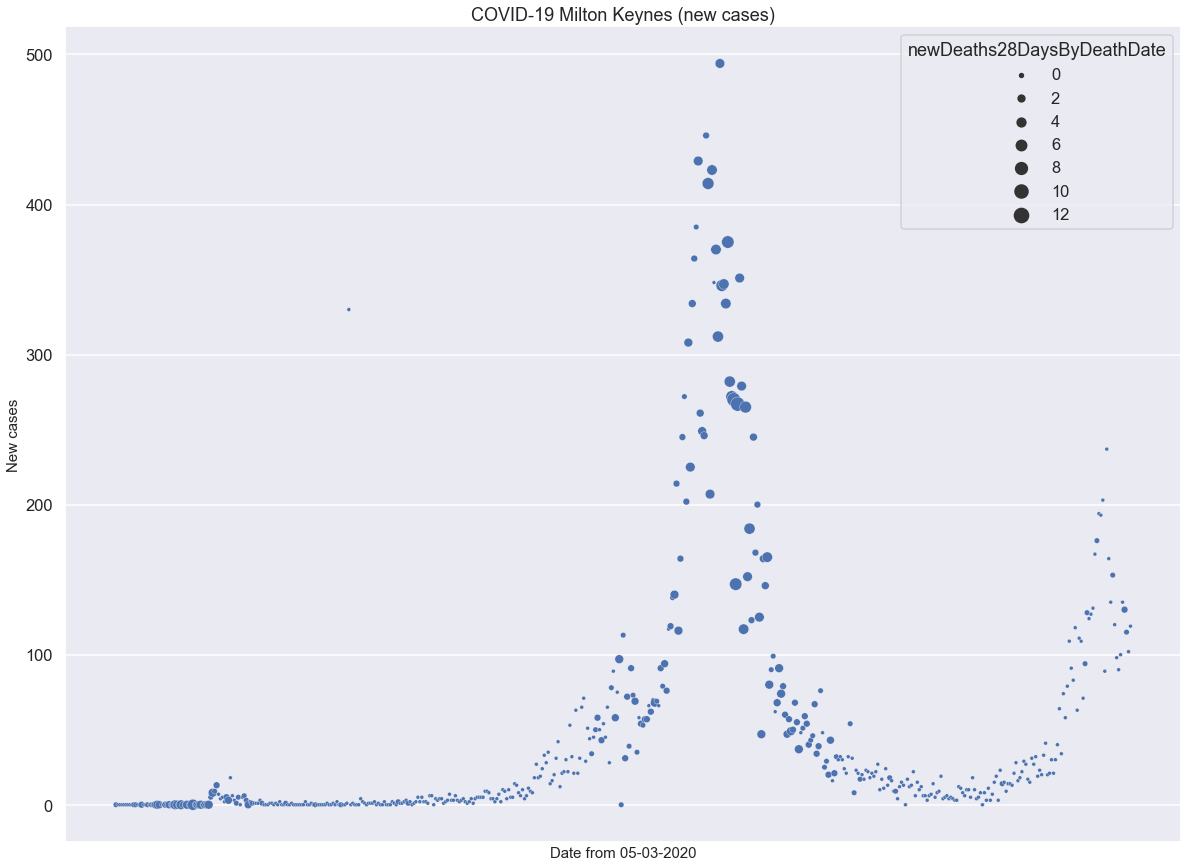

In [7]:
# create the plot
fig, ax = plt.subplots(figsize = (20,15))
# remove X Ticks
plt.xticks([])
# rename X and Y label
plt.xlabel('Date from 05-03-2020', fontsize=15)
plt.ylabel('New cases', fontsize=15)
# set title
plt.title("COVID-19 Milton Keynes (new cases)")
# create plot
sns.scatterplot(x='date', y='newCasesByPublishDate', size="newDeaths28DaysByDeathDate", sizes=(15,200), data=df)

<AxesSubplot:title={'center':'COVID-19 Milton Keynes (cumulative deaths)'}, xlabel='Date from 05-03-2020', ylabel='Cumulative Deaths - 28 days by death date'>

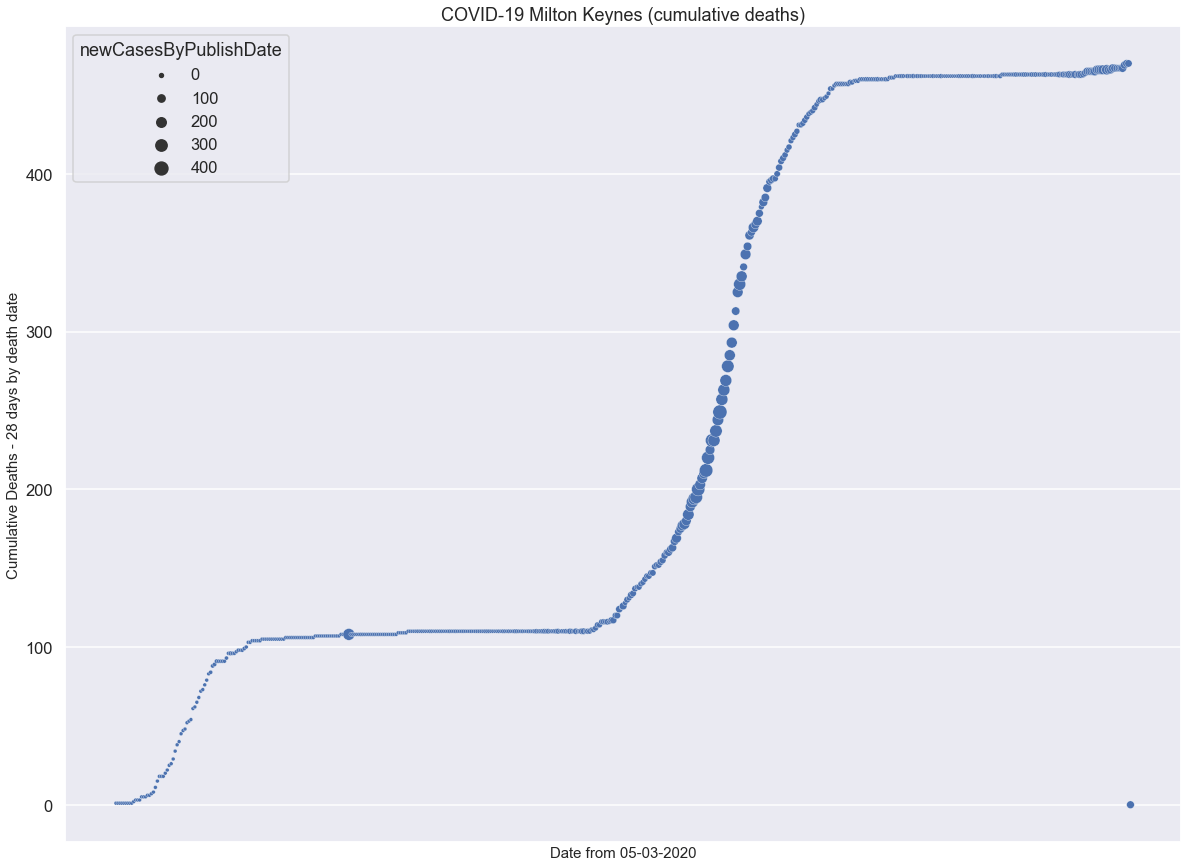

In [8]:
# create the plot
fig, ax = plt.subplots(figsize = (20,15))
# remove X Ticks
plt.xticks([])
# rename X and Y label
plt.xlabel('Date from 05-03-2020', fontsize=15)
plt.ylabel('Cumulative Deaths - 28 days by death date', fontsize=15)
# set title
plt.title("COVID-19 Milton Keynes (cumulative deaths)")
# create plot
sns.scatterplot(x='date', y='cumDeaths28DaysByDeathDate', size='newCasesByPublishDate', sizes=(15,200), data=df)

In [9]:
df.corr()

,newCasesByPublishDate,cumCasesByPublishDate,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
newCasesByPublishDate,1.000000,0.036812,0.604956,0.180896
cumCasesByPublishDate,0.036812,1.000000,-0.022605,-0.062086
newDeaths28DaysByDeathDate,0.604956,-0.022605,1.000000,-0.010431
cumDeaths28DaysByDeathDate,0.180896,-0.062086,-0.010431,1.000000


[Text(0, 0.5, 'Cumulative Deaths - 28 days by death date')]

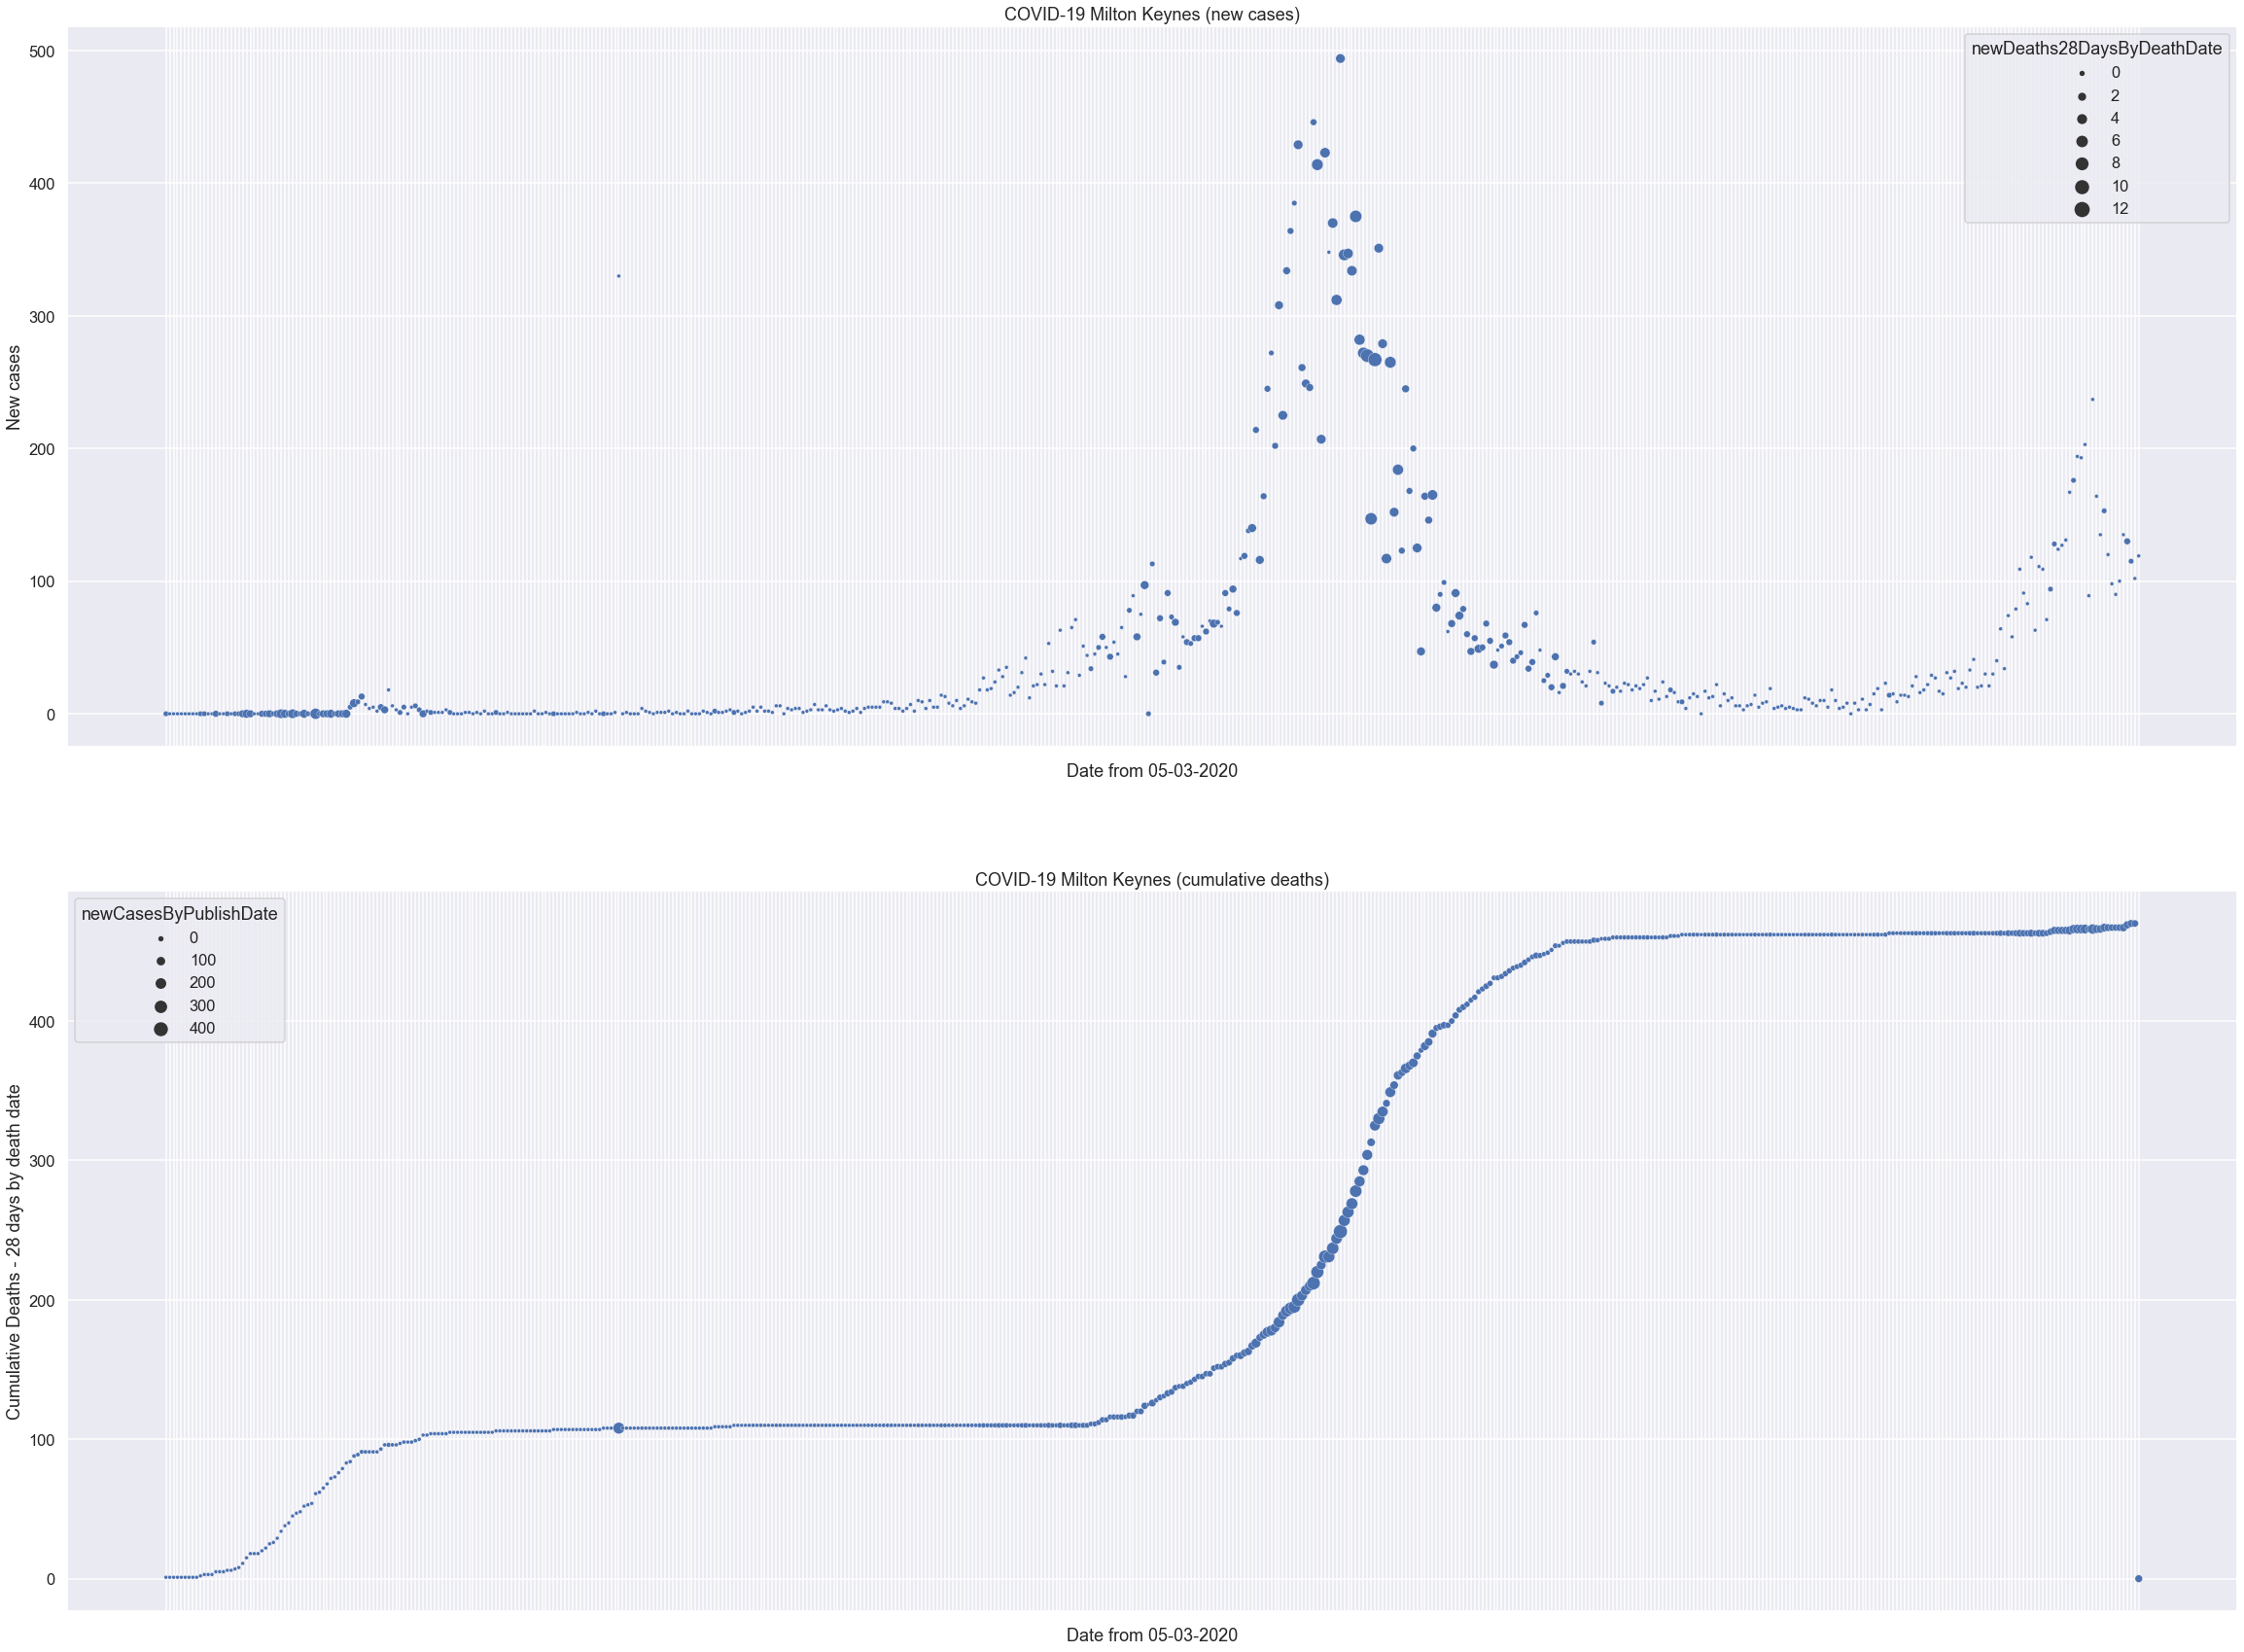

In [10]:
# create the plot (1 row, 2 columns)
fig, axes = plt.subplots(2, 1, figsize = (40,30))
# create plot 1
g1 = sns.scatterplot(x='date', y='newCasesByPublishDate', size="newDeaths28DaysByDeathDate", sizes=(15,200), data=df, ax=axes[0])
g1.set(xticklabels=[])
g1.set(title="COVID-19 Milton Keynes (new cases)")
g1.set(xlabel='Date from 05-03-2020')
g1.set(ylabel="New cases")

# create plot 2
g2 = sns.scatterplot(x='date', y='cumDeaths28DaysByDeathDate', size='newCasesByPublishDate', sizes=(15,200), data=df, ax=axes[1])
g2.set(xticklabels=[])
g2.set(title="COVID-19 Milton Keynes (cumulative deaths)")
g2.set(xlabel='Date from 05-03-2020')
g2.set(ylabel="Cumulative Deaths - 28 days by death date")

In [11]:
# first attempt with plotly
df.iplot(kind='scatter',x='date', y='newCasesByPublishDate', mode='markers',size=10)

In [12]:
# using plotly express
df = df.dropna()
fig = px.scatter(df, x='date', y='newCasesByPublishDate', size="newDeaths28DaysByDeathDate", title="COVID-19 Milton Keynes (new cases)")
fig.show()

In [13]:
# using plotly express
df = df.dropna()
fig = px.scatter(df, x='date', y='cumDeaths28DaysByDeathDate', size='newCasesByPublishDate', title="COVID-19 Milton Keynes (cumulative deaths)")
fig.show()